# Projeto 2 - Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Carregando o dataset

df = pd.read_csv('dataset.csv')

In [3]:
# Amostra dos dados (primeiras 10 linhas)

df.head(10)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
5,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800
7,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000


In [4]:
# Shape (número de linhas, número de colunas)

df.shape

(9700, 11)

In [5]:
# Nome das colunas e tipo de dados de cada coluna

df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [6]:
# Reusmo estatístico da coluna "Valor_Venda"

df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [7]:
# Verificando registros duplicados

df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [8]:
# Verificando se há registros nulos

df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

### Pergunta de Negócio 1

Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [9]:
# Filtramos o dataframe com os registros da categoria Office Supplies.
# Agrupamos por cidade e calculamos o total de vendas de cada cidade
# Encontramos a cidade com o maior valor de venda

cidade_maior_venda = df[df['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().idxmax()

print("A cidade com maior valor de venda da categoria Office Supplies é: ", cidade_maior_venda)

A cidade com maior valor de venda da categoria Office Supplies é:  New York City


### Pergunta de Negócio 2

Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.

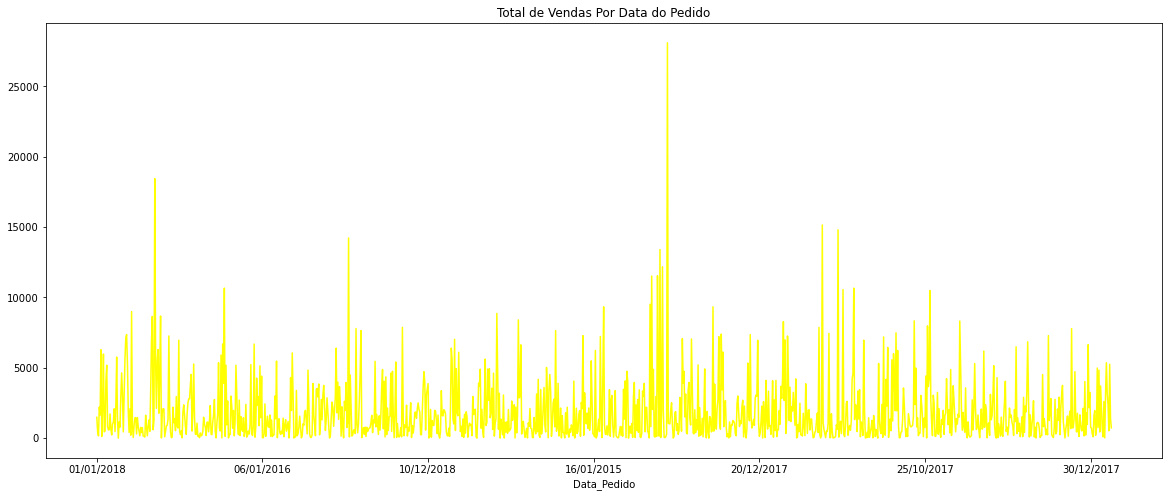

In [10]:
# Calculamos o total de vendas para cada data do pedido e criamos o gráfico

plt.figure(figsize = (20, 8))
pergunta_2 = df.groupby('Data_Pedido')['Valor_Venda'].sum() \
                                        .plot(x = 'Data_Pedido' , y = 'Valor_Venda', color = 'yellow')

plt.title('Total de Vendas Por Data do Pedido')
plt.show()                             

### Pergunta de Negócio 3

Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras

In [11]:
# Todos os estados e o total de vendas por estado

df.groupby('Estado')['Valor_Venda'].sum()

Estado
Alabama                  19510.6400
Arizona                  35272.6570
Arkansas                 11673.8300
California              442927.0975
Colorado                 31841.5980
Connecticut              13366.7370
Delaware                 26452.5890
District of Columbia      2865.0200
Florida                  88043.7000
Georgia                  48083.1600
Idaho                     4292.5160
Illinois                 78109.9270
Indiana                  48718.4000
Iowa                      4443.5600
Kansas                    2914.3100
Kentucky                 36409.5800
Louisiana                 9131.0500
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            27363.2640
Michigan                 76081.1740
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7194.9500
Nevada                   16729.1020
New Hampshire        

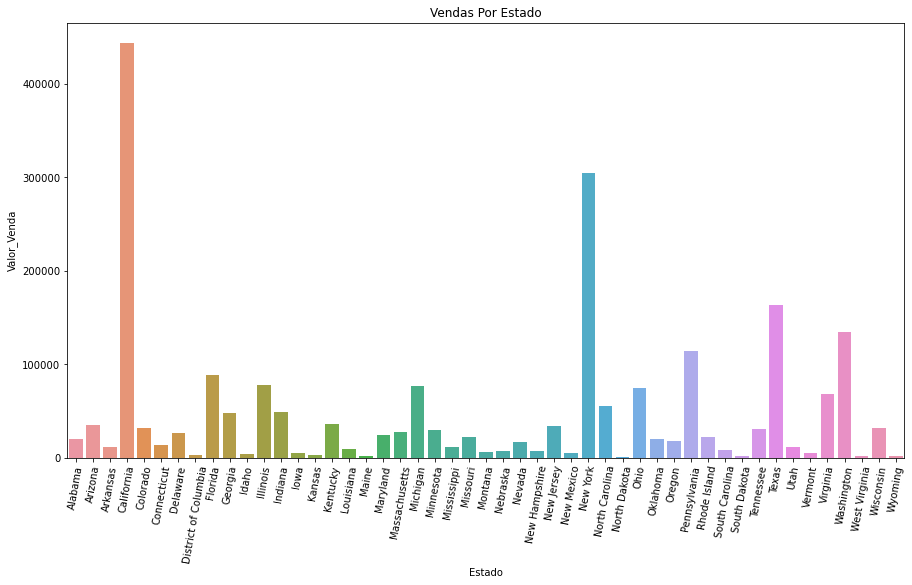

In [12]:
# Agrupamos por estado e calculamos o total de vendas
pergunta_3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

# Criando gráfico
plt.figure(figsize = (15, 8))
sns.barplot(data = pergunta_3, 
           y = 'Valor_Venda',
           x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

### Pergunta de Negócio 4

Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

In [13]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando apenas os primeiros 10 registros

pergunta_4 = df.groupby('Cidade')['Valor_Venda'].sum() \
                                                .reset_index() \
                                                .sort_values(by = 'Valor_Venda', ascending = False) \
                                                .head(10)

pergunta_4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


<function matplotlib.pyplot.show(close=None, block=None)>

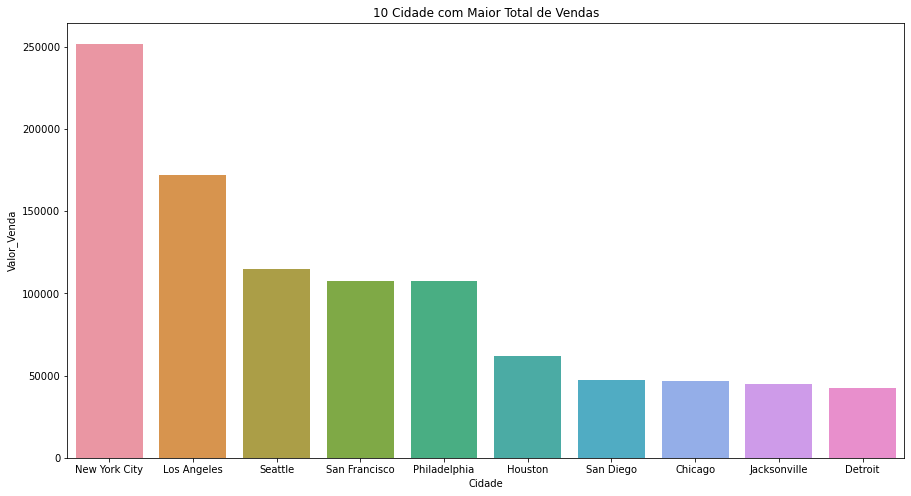

In [14]:
# Criando gráfico 

plt.figure(figsize = (15, 8))
sns.set_palette('coolwarm')
sns.barplot(data = pergunta_4,
           y = 'Valor_Venda',
           x = 'Cidade').set(title = '10 Cidade com Maior Total de Vendas')
plt.show

### Pergunta de Negócio 5

Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.

In [36]:
# Agrupamos por segmento e calculamos o total de vendas

pergunta_5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)
pergunta_5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [37]:
# Criando função para converter os dados em valor absoluto

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

<function matplotlib.pyplot.show(close=None, block=None)>

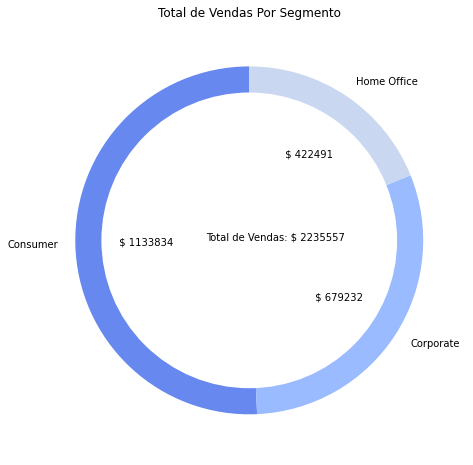

In [38]:
# Gráfico 

plt.figure(figsize = (15, 8))
plt.pie(pergunta_5['Valor_Venda'],
        labels = pergunta_5['Segmento'],
        autopct = autopct_format(pergunta_5['Valor_Venda']),
        startangle = 90)

# Cria um círculo branco no meio do gráfico

centre_circle = plt.Circle((0, 0), 0.85, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Cria anotações no gráfico e adiciona título

plt.annotate(text = 'Total de Vendas: $ ' + str(int(sum(pergunta_5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show

### Pergunta de Negócio 6

Qual o Total de Vendas Por Segmento e Por Ano?